In [1]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df.rename(columns = {'Q1': 'age'}, inplace = True)
df.rename(columns = {'Q2': 'gender'}, inplace = True)
df.rename(columns = {'Q3': 'marital_status'}, inplace = True)
df.rename(columns = {'Q4': 'education_level'}, inplace = True)
df.rename(columns = {'Q5': 'land_owner'}, inplace = True)
df.rename(columns = {'Q6': 'land_certify'}, inplace = True)
df.rename(columns = {'Q7':'mobile_phone'}, inplace = True)
df.rename(columns = {'Q18': 'lit_swahili'}, inplace = True)
df.rename(columns = {'Q19': 'lit_english'}, inplace = True)
df.rename(columns = {'Q16': 'mb_purchase_per_annual'},inplace = True)
df.rename(columns = {'Q17': 'mb_paybill_per_annual'},inplace = True)
df.rename(columns = {'Q15': 'last_receive_money'},inplace = True)
df.rename(columns = {'Q13': 'last_send_money'},inplace = True)
df.rename(columns = {'Q12': 'send_money_per_annual'},inplace = True)
df.rename(columns = {'Q14': 'receive_money_per_annual'},inplace = True)
df.rename(columns = {'Q8_1': 'money_due_salaries'},inplace = True)
df.rename(columns = {'Q8_2': 'money_due_selling'},inplace = True)
df.rename(columns = {'Q8_3': 'money_due_service'},inplace = True)
df.rename(columns = {'Q8_4': 'occassional_jobs'}, inplace = True)
df.rename(columns = {'Q8_5': 'rental_icome'},inplace = True)
df.rename(columns = {'Q8_6': 'interest'}, inplace = True)
df.rename(columns = {'Q8_7': 'pension'}, inplace = True)
df.rename(columns = {'Q8_8':'grant_social_welfare'}, inplace = True)
df.rename(columns = {'Q8_9': 'depend_money_others'}, inplace = True)
df.rename(columns = {'Q8_10': 'get_money_for_expenses'}, inplace = True)
df.rename(columns = {'Q8_11': 'other'}, inplace = True)
df.rename(columns = {'Q9': 'work_for_salaries'}, inplace = True)
df.rename(columns = {'Q10': 'mainly_selling_things'}, inplace = True)
df.rename(columns = {'Q11': 'mainly_services_provides'}, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7094 non-null   int64  
 1   age                          7094 non-null   int64  
 2   gender                       7094 non-null   int64  
 3   marital_status               7094 non-null   int64  
 4   education_level              7094 non-null   int64  
 5   land_owner                   7094 non-null   int64  
 6   land_certify                 7094 non-null   int64  
 7   mobile_phone                 7094 non-null   int64  
 8   money_due_salaries           7094 non-null   int64  
 9   money_due_selling            7094 non-null   int64  
 10  money_due_service            7094 non-null   int64  
 11  occassional_jobs             7094 non-null   int64  
 12  rental_icome                 7094 non-null   int64  
 13  interest          

# HYPOTHESIS
1.People with age above 60  will not have both mobile money and other financial services.

2.People with lower education level are less likely to posses mobile money.

3.People with mobile phones are most likely to use mobile money.

4.Almost every who gets through salaries or wages is less likely to use mobile money only.

5.Almost every who works for government has insurance

# A.UNIVARIATE ANALYSIS

In [5]:
#1.Married, 2.Divorced 3.Widowed 4.Single/Never Married
df['marital_status'].value_counts()

1    4548
4    1181
2     687
3     678
Name: marital_status, dtype: int64

In [6]:
#1 for male and 2 for female
df['gender'].value_counts()

2    3972
1    3122
Name: gender, dtype: int64

In [7]:
#1.no formal, 2.some primary, 3.primary completed, 4.primary technical training,5.some secondary,6.university,7.Don't know
df['education_level'].value_counts()

3    3446
1    1199
2    1046
6     708
5     467
7     192
4      34
8       2
Name: education_level, dtype: int64

In [8]:
df.isnull().sum()

ID                             0
age                            0
gender                         0
marital_status                 0
education_level                0
land_owner                     0
land_certify                   0
mobile_phone                   0
money_due_salaries             0
money_due_selling              0
money_due_service              0
occassional_jobs               0
rental_icome                   0
interest                       0
pension                        0
grant_social_welfare           0
depend_money_others            0
get_money_for_expenses         0
other                          0
work_for_salaries              0
mainly_selling_things          0
mainly_services_provides       0
send_money_per_annual          0
last_send_money                0
receive_money_per_annual       0
last_receive_money             0
mb_purchase_per_annual         0
mb_paybill_per_annual          0
lit_swahili                    0
lit_english                    0
Latitude  

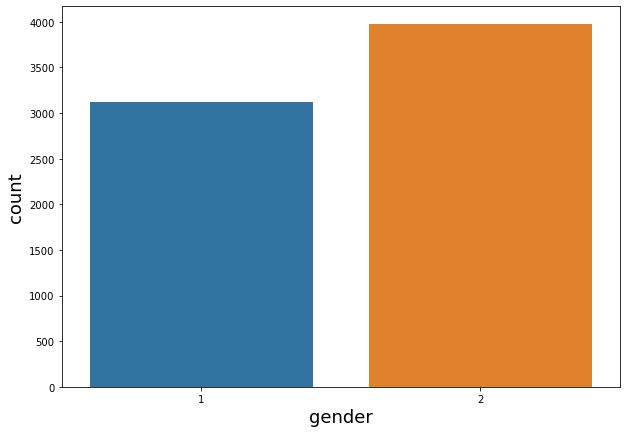

In [9]:
#1 for male and 2 for female
plt.figure(figsize = (10,7)) 
sns.countplot(x = df['gender'], data = df)
plt.show()

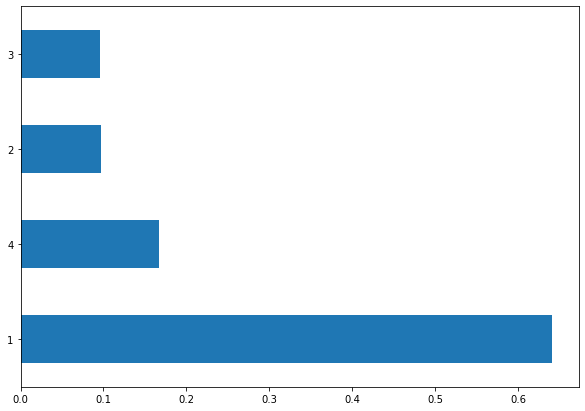

In [10]:
#Categorical unordered analysis marital status 1.Married, 2.Divorced 3.Widowed 4.Single/Never Married 
plt.figure(figsize = (10,7))
df.marital_status.value_counts(normalize=True).plot.barh()
plt.show()

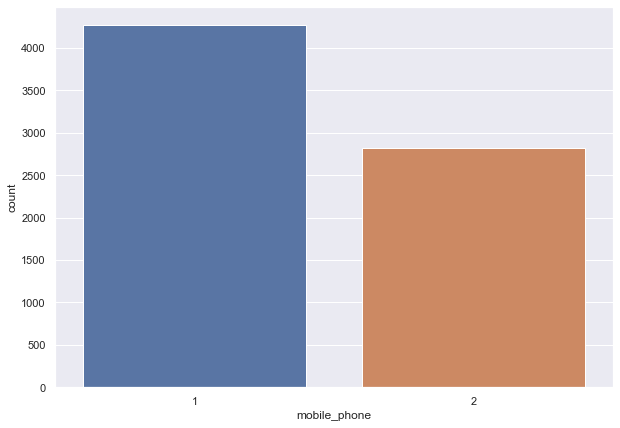

In [11]:
#1.Yes 2.No
plt.figure(figsize = (10,7)) 
sns.set_theme(style ='darkgrid')
sns.countplot(x = df['mobile_phone'], data = df)
plt.show()

In [12]:
#Categorical unordered analysis like education level on the datasets
df.education_level.value_counts(normalize=True)

3    0.485763
1    0.169016
2    0.147449
6    0.099803
5    0.065830
7    0.027065
4    0.004793
8    0.000282
Name: education_level, dtype: float64

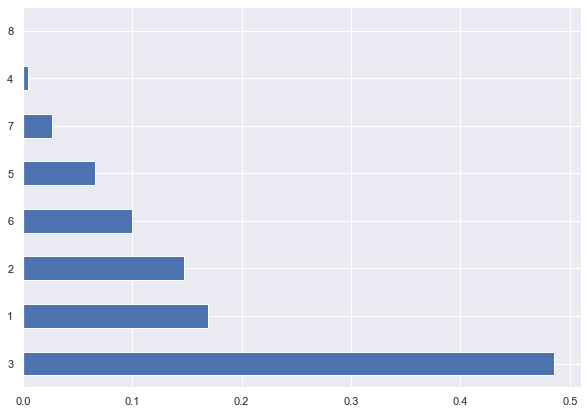

In [13]:
plt.figure(figsize = (10,7))
df.education_level.value_counts(normalize=True).plot.barh()
plt.show()

This shows High percentage based on the primary level completed(3) individuals while low percentage shown by post primary technical training

# B. BIVARIATE ANALYSIS

#                               1.Numerical and Categorical variables

In [14]:
# numerical to categorical analysis, by using mean, median and boxplots
df.groupby('mobile_money_classification')['age'].mean()

mobile_money_classification
0    41.375180
1    40.025872
2    36.176617
3    36.363724
Name: age, dtype: float64

In [15]:
df.groupby('mobile_money_classification')['age'].median()

mobile_money_classification
0    36.0
1    36.0
2    32.0
3    34.0
Name: age, dtype: float64

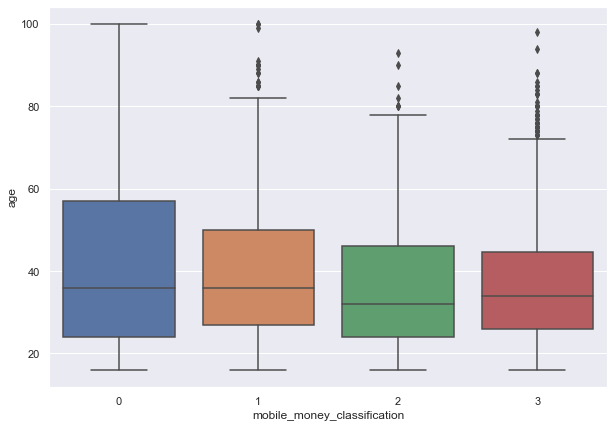

In [16]:
#Measure the hypothesis 01
plt.figure(figsize = (10,7))
sns.boxplot(x = df['mobile_money_classification'], y = df['age'], data = df)
plt.show()

As we can see, when we plot the Box Plot,  The IQR for no mobile money and other financial services(0)
is on the higher age side.While the median age are the same for 0 and 1, and slightly changes occured on 2 and 3.Hypothesis 01 is True

# Categorical and Categorical Variables

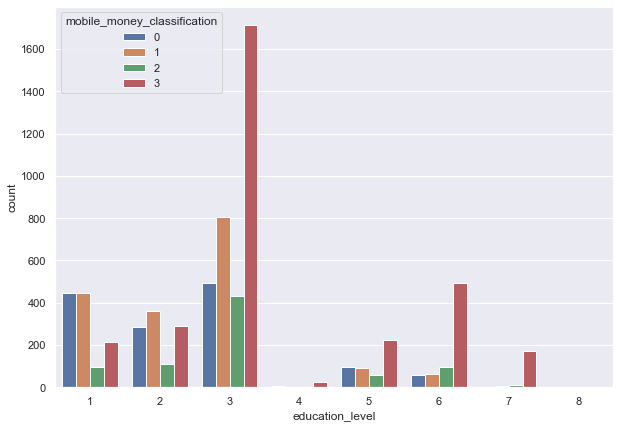

In [17]:
plt.figure(figsize = (10,7))
sns.countplot(df['education_level'], hue = 'mobile_money_classification', data = df)
plt.show()

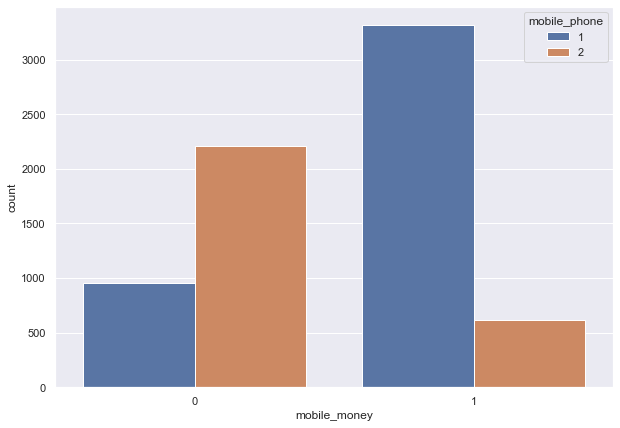

In [18]:
plt.figure(figsize = (10,7))
sns.countplot(df['mobile_money'], hue = 'mobile_phone', data = df)
plt.show()

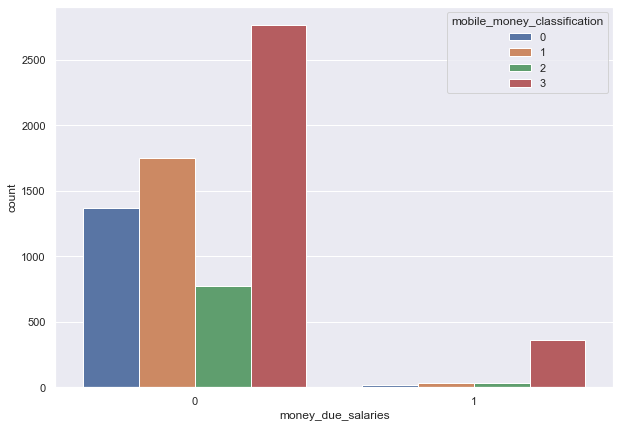

In [19]:

plt.figure(figsize = (10,7))
sns.countplot(df['money_due_salaries'], hue = 'mobile_money_classification', data = df)
plt.show()

# OUTLIERS

In [20]:
df_age = df['age']
Q3 = df_age.quantile(0.75)
Q1 = df_age.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
age_outliers = df_age[(df_age <lower_limit) | (df_age >upper_limit)]
age_outliers.head(20)

0        98
35       86
256      94
327      85
346      90
348      85
393      87
924      85
1180     96
1351     88
1391     83
1503     83
1622     86
1741     90
1890     92
2100     84
2109     88
2176     94
2319    100
2403     90
Name: age, dtype: int64

In [21]:
df = df.drop([0, 185,568, 571, 824, 857,35,256,327, 346, 348, 393, 924, 1180,1351, 1391, 1503, 1622, 1741, 1890, 2100, 2109, 2176, 2319,2403,2495, 2513, 2702, 2763,
              2857, 2903,3106, 3210, 3245, 3308, 3324, 3337, 3374, 3447, 3534, 3584, 3646,3748, 3930])

# ANSWERS
1.People with age above 60  will not have both mobile money and other financial services.TRUE

2.People with lower education level are less likely to posses mobile money.FALSE

3.People with mobile phones are most likely to use mobile money.TRUE

4.Almost every who gets through salaries or wages is less likely to use mobile money only.FALSE

5.Almost every who works for government has insurance.TRUE

# FEATURING SELECTION

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [23]:
df = df.drop('Longitude', axis = True)
df = df.drop('Latitude', axis = True)
df = df.drop('ID',axis=True)

In [24]:
df['gender'] = df['gender'].replace(2,0)
df['land_certify'] = df['land_certify'].replace(2,0)
df['mobile_phone'] = df['mobile_phone'].replace(2,0)
df['send_money_per_annual'] = df['send_money_per_annual'].replace(2,0)
df['receive_money_per_annual'] = df['receive_money_per_annual'].replace(2,0)

In [25]:
df

,age,gender,marital_status,education_level,land_owner,land_certify,mobile_phone,money_due_salaries,money_due_selling,money_due_service,...,last_receive_money,mb_purchase_per_annual,mb_paybill_per_annual,lit_swahili,lit_english,mobile_money,savings,borrowing,insurance,mobile_money_classification
1,40,1,1,3,5,1,1,1,0,0,...,5,4,4,1,4,1,1,1,0,3
2,18,0,4,6,3,0,1,0,0,0,...,-1,1,-1,1,1,1,0,0,0,2
3,50,1,1,3,1,1,1,0,0,0,...,-1,4,-1,1,4,1,0,1,0,3
4,34,1,1,1,1,0,1,0,1,0,...,1,1,-1,1,4,1,1,0,1,3
5,35,1,1,3,3,0,1,0,1,0,...,3,1,-1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,57,0,3,3,1,0,0,0,1,0,...,-1,1,-1,1,4,0,1,0,0,1
7090,32,1,1,6,3,1,1,0,1,0,...,1,5,-1,1,1,1,1,0,0,3
7091,22,0,3,3,3,0,0,0,1,0,...,-1,1,-1,4,4,0,0,0,0,0
7092,28,0,1,3,1,0,0,0,1,0,...,-1,1,-1,1,4,1,0,0,1,3


In [26]:
features = df.drop('mobile_money_classification', axis = 1)
target = df['mobile_money_classification']

In [27]:
categorical_features  = ['marital_status','education_level','land_owner',
                          'work_for_salaries','mainly_selling_things','mainly_services_provides',
                          'last_send_money','last_receive_money','mb_purchase_per_annual',
                           'mb_paybill_per_annual','lit_swahili', 'lit_english'  
                        ]
# One Hot Encoding conversion
df = pd.get_dummies(df, prefix_sep='_', columns = categorical_features)

df.shape

(7050, 104)

# NORMALIZATION 

In [28]:

from sklearn.preprocessing import MinMaxScaler

# # feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))

df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))

In [29]:
# save the model to disk
filename = 'MinMaxScaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target, test_size = 0.2, random_state = 42)

In [31]:
# feature selection
def select_features():
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [32]:
X_train_fs, X_test_fs, fs = select_features()
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.024935
Feature 1: 0.022609
Feature 2: 0.019422
Feature 3: 0.067027
Feature 4: 0.020083
Feature 5: 0.006615
Feature 6: 0.155550
Feature 7: 0.019148
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 0.007328
Feature 12: 0.003078
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.020245
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.025216
Feature 19: 0.019797
Feature 20: 0.007824
Feature 21: 0.181744
Feature 22: 0.199790
Feature 23: 0.237995
Feature 24: 0.230836
Feature 25: 0.185626
Feature 26: 0.053896
Feature 27: 0.064104
Feature 28: 0.053794
Feature 29: 0.685142
Feature 30: 0.253589
Feature 31: 0.213652
Feature 32: 0.064531


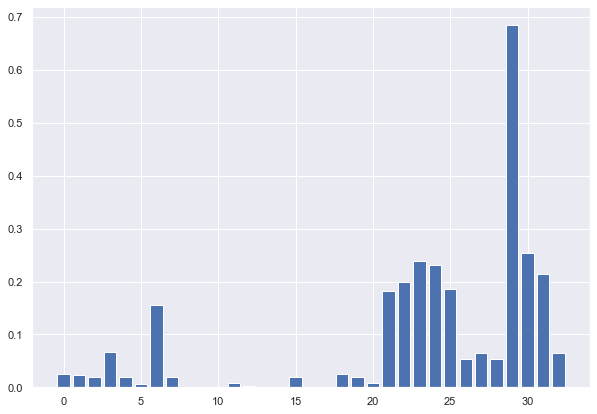

In [33]:
from matplotlib import pyplot
plt.figure(figsize = (10,7))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In this case, we can see that some of the features have a very low score, suggesting that perhaps they can be removed.

Perhaps features
07, 22, 23,24,25,26,30,31,32,33, and 34 are most relevant.

[9.92241271e-03 3.62573024e-03 5.55302530e-03 8.25575675e-03
 6.17606546e-03 3.03164720e-03 2.65434675e-02 2.02667866e-03
 3.84779158e-03 1.31484779e-03 3.39325130e-03 4.52028794e-04
 1.83676304e-04 3.75886710e-04 8.93415476e-04 2.67769342e-03
 2.96064326e-03 4.29847912e-05 1.31269936e-03 4.41678085e-03
 1.38015640e-03 3.83371575e-02 2.55971900e-02 5.39209186e-02
 3.12368145e-02 3.15850743e-02 6.96893338e-03 7.46344940e-03
 6.87461673e-03 2.62161953e-01 1.94062371e-01 1.92192115e-01
 6.12127674e-02]


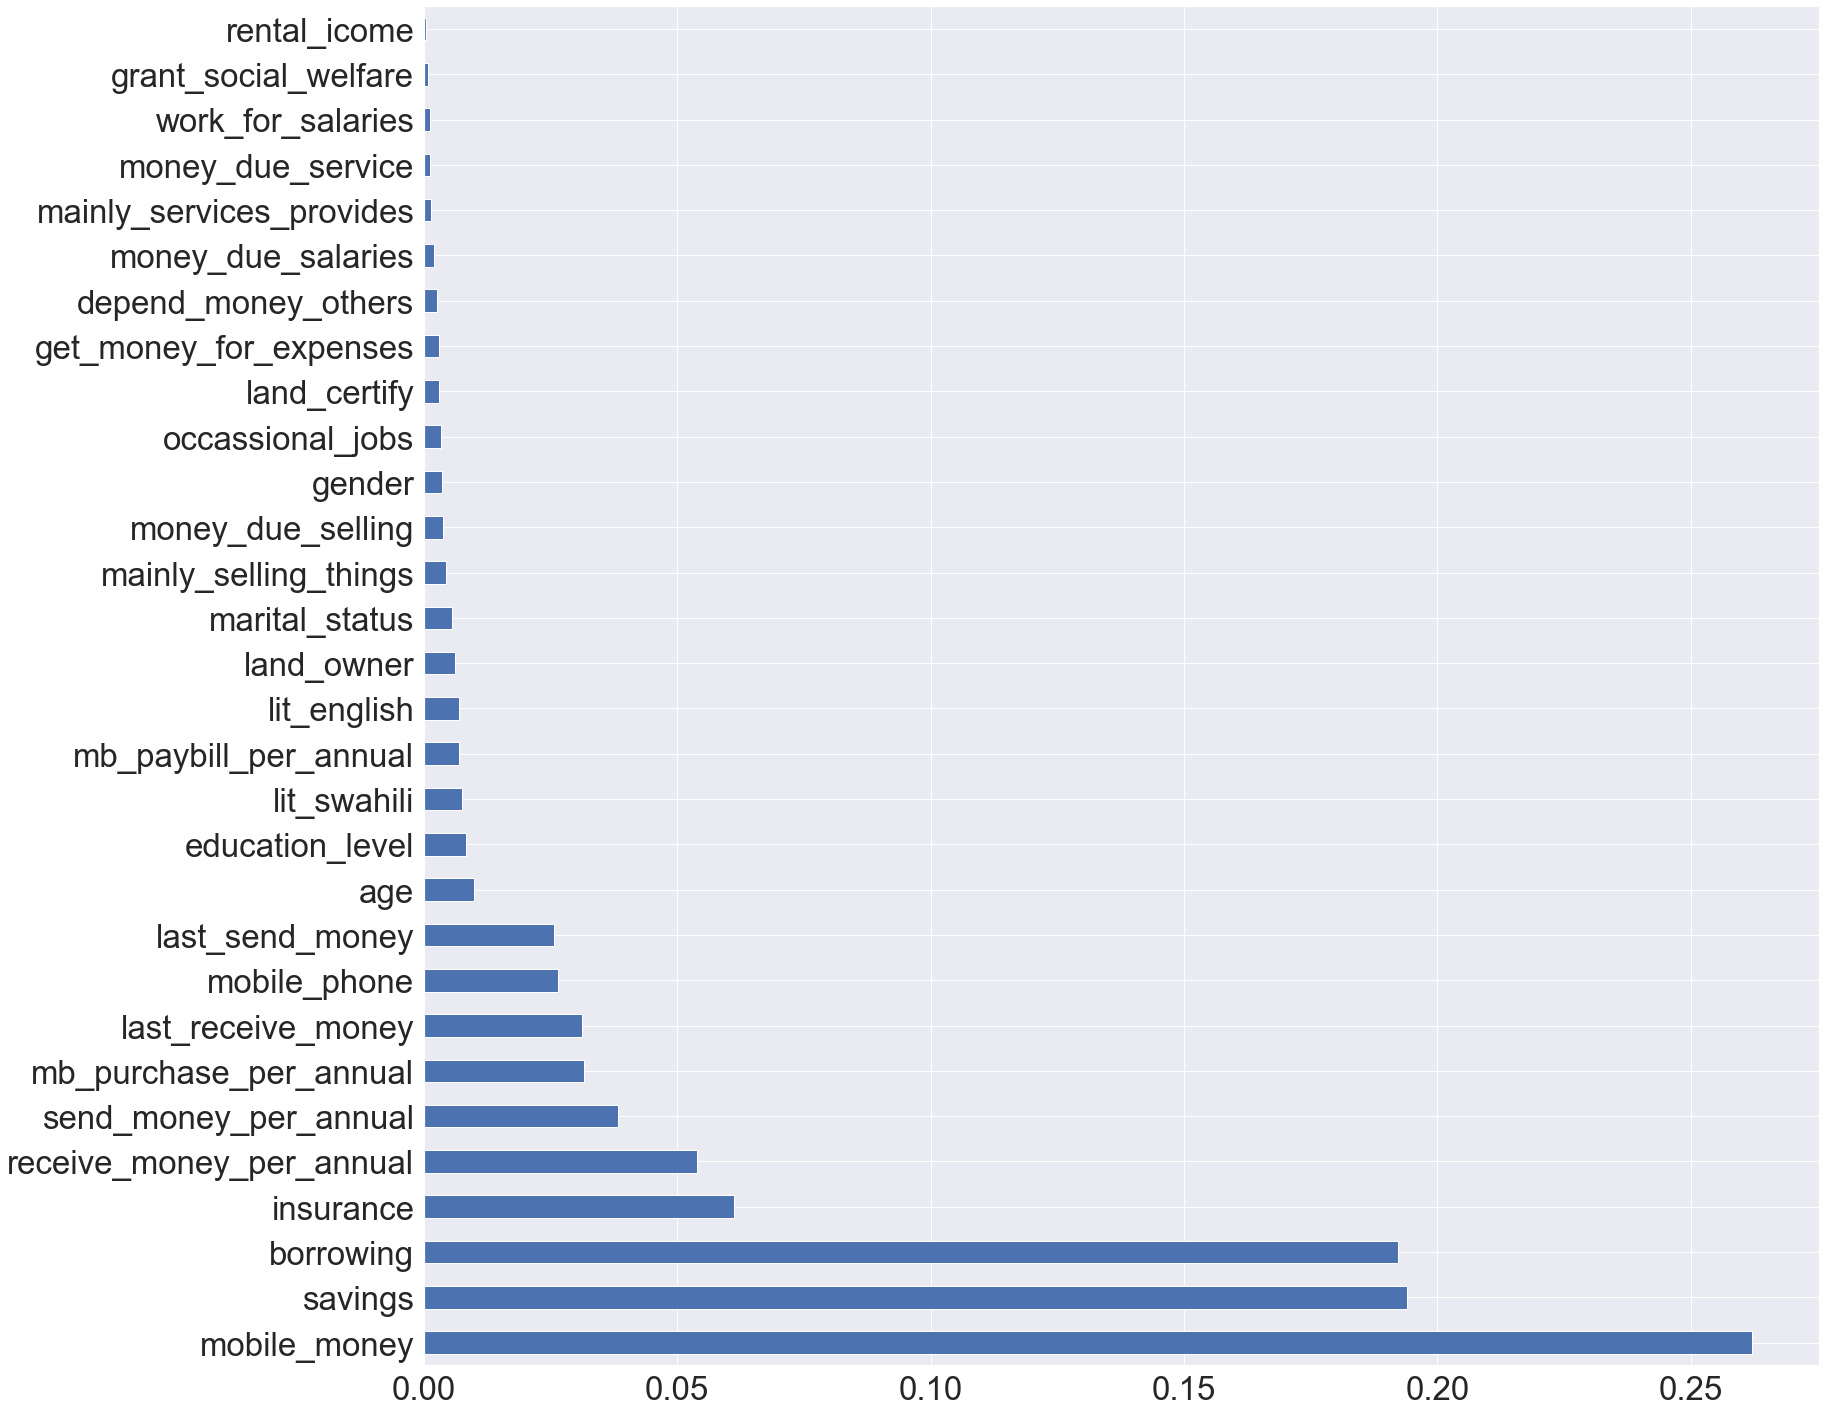

In [34]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier

#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind = 'barh')
plt.show() 

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [36]:
filename = 'group_07_model2.sav'
pickle.dump(dt, open(filename, 'wb'))

In [37]:
print("Training Accuracy :", dt.score(X_train, y_train))
print("Testing Accuracy :", dt.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


<Figure size 720x504 with 0 Axes>

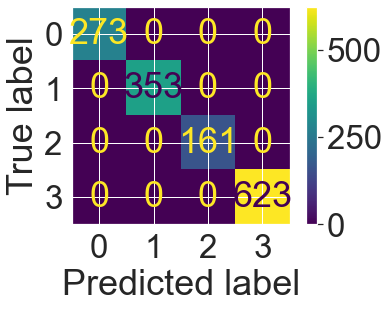

In [38]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(dt,X_test, y_test)
plt.show()

# 1.VOTING CLASSIFIER

What is voting classifier?

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) 

based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed 

into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating

separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and

predicts output based on their combined majority of voting for each output class.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
              ]

In [41]:
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    print(name, accuracy_score(y_test, predictions))

Neural Network : 1.0
LogisticRegression : 1.0
ExtraTreesClassifier : 1.0
DecisionTree : 1.0
RandomForest : 1.0
Naive Bayes : 0.9929078014184397
KNeighbours : 0.6780141843971631
SVM : 0.7113475177304964
AdaBoostClassifier : 0.6921985815602837
GradientBoostingClassifier:  1.0


In [42]:
X_test.shape

(1410, 33)

As we can see that LogisticRegression,ExtraTreesClassifier, DecisionTree, Naive Bayes and RandomForest are showing the higher

accuracy score than the rest, we can use these models in voting classifier.

In [43]:
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = LogisticRegression(max_iter = 1000)
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()
clf5 = GaussianNB()

In [44]:
from sklearn.model_selection import cross_val_score
c = []
c.append(cross_val_score(clf1,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf2,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf3,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf4,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf5,X_train,y_train,scoring='accuracy',cv=10).mean())
print(c)

[0.999822695035461, 1.0, 0.999822695035461, 1.0, 0.9932624113475178]


# 2.Histogram-based Gradient Boosting Classification Tree

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [46]:
clf = HistGradientBoostingClassifier(loss = 'categorical_crossentropy',learning_rate=0.1, max_iter=1000)
clf.fit(X_train,y_train)

HistGradientBoostingClassifier(loss='categorical_crossentropy', max_iter=1000)

In [47]:
 clf.score(X_train,y_train)

1.0